In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functions import read_params_and_metrics, graficar_correlacion

id = ["name", "run_uuid"]
architecture = [
    "arc_num_conv1",
    "arc_num_layers",
    "arc_num_conv2",
    "arc_latent_dim",
    "arc_latent_volume",
    "arc_skip",
    "arc_encoder_blocks",
]

train = ["train_loss", "train_Accuracy", "train_Accuracy_seq"]

valid = ["valid_loss", "valid_Accuracy", "valid_Accuracy_seq"]

test = [
    "test_loss",
    "test_Accuracy",
    "test_Accuracy_seq",
]

columns = id + architecture + train + valid + test

In [44]:
BASE_PATH = "/home/guillermo/Documents/SINC/Research/RNA/analysis/AEseq2seq/"
v4p = "notebooks/from_db/Unet/selection/v4p/"
# v4c = "notebooks/from_db/Unet/selection/v4c/"
v4p_e1 = "notebooks/from_db/Unet/selection/v4p_e1/"
v4p_f0 = "notebooks/from_db/Unet/selection/v4p_f0/"

In [45]:
v4p, mp = read_params_and_metrics(BASE_PATH, v4p, columns)
# v4c, _ = read_params_and_metrics(BASE_PATH, v4c, columns)
v4p_e1, me1 = read_params_and_metrics(BASE_PATH, v4p_e1, columns)
v4p_f0, mp2 = read_params_and_metrics(BASE_PATH, v4p_f0, columns)

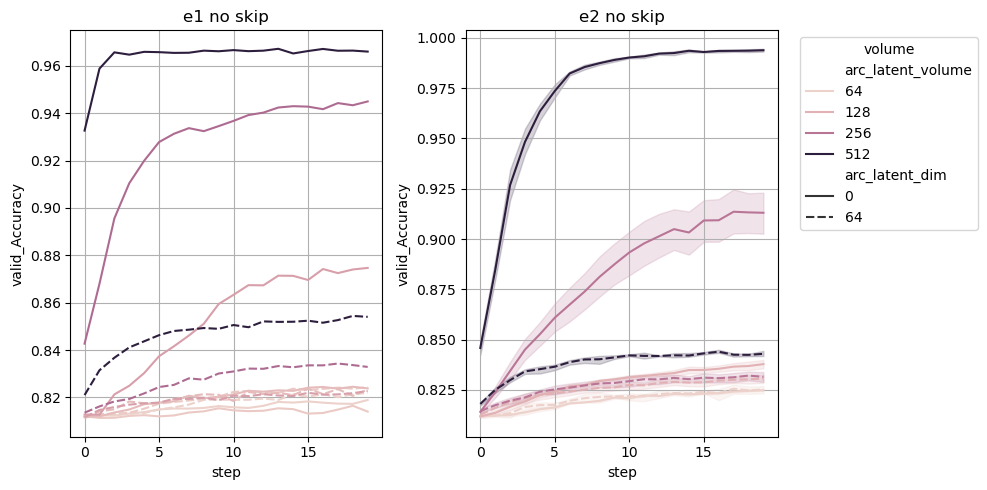

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title("e1 no skip")
sns.lineplot(
    data=me1[me1["arc_skip"] == 0],
    x="step",
    y="valid_Accuracy",
    hue="arc_latent_volume",
    style="arc_latent_dim",
    ax=ax[0],
    legend=False,
)

ax[1].set_title("e2 no skip")
sns.lineplot(
    data=me2[me2["arc_skip"] == 0],
    x="step",
    y="valid_Accuracy",
    hue="arc_latent_volume",
    style="arc_latent_dim",
    ax=ax[1],
)
ax[1].legend(title="volume", bbox_to_anchor=(1.05, 1), loc="upper left")
for a in ax:
    a.grid(True)
fig.tight_layout()

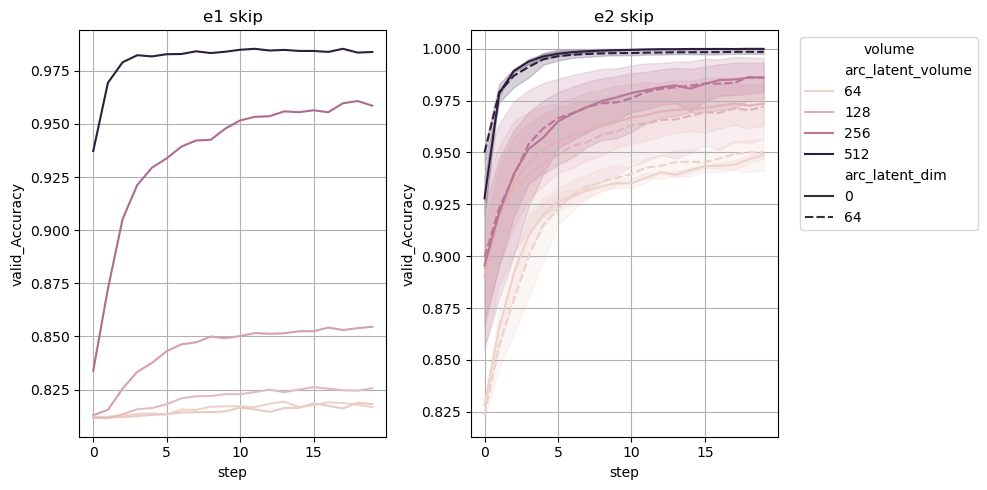

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title("e1 skip")
sns.lineplot(
    data=me1[me1["arc_skip"] == 1],
    x="step",
    y="valid_Accuracy",
    hue="arc_latent_volume",
    style="arc_latent_dim",
    ax=ax[0],
    legend=False,
)

ax[1].set_title("e2 skip")
sns.lineplot(
    data=me2[me2["arc_skip"] == 1],
    x="step",
    y="valid_Accuracy",
    hue="arc_latent_volume",
    style="arc_latent_dim",
    ax=ax[1],
)
ax[1].legend(title="volume", bbox_to_anchor=(1.05, 1), loc="upper left")
for a in ax:
    a.grid(True)
fig.tight_layout()

In [46]:
me2 = pd.concat([mp, mp2])

In [4]:
data = pd.concat([v4p, v4p_e1, v4p_f0])

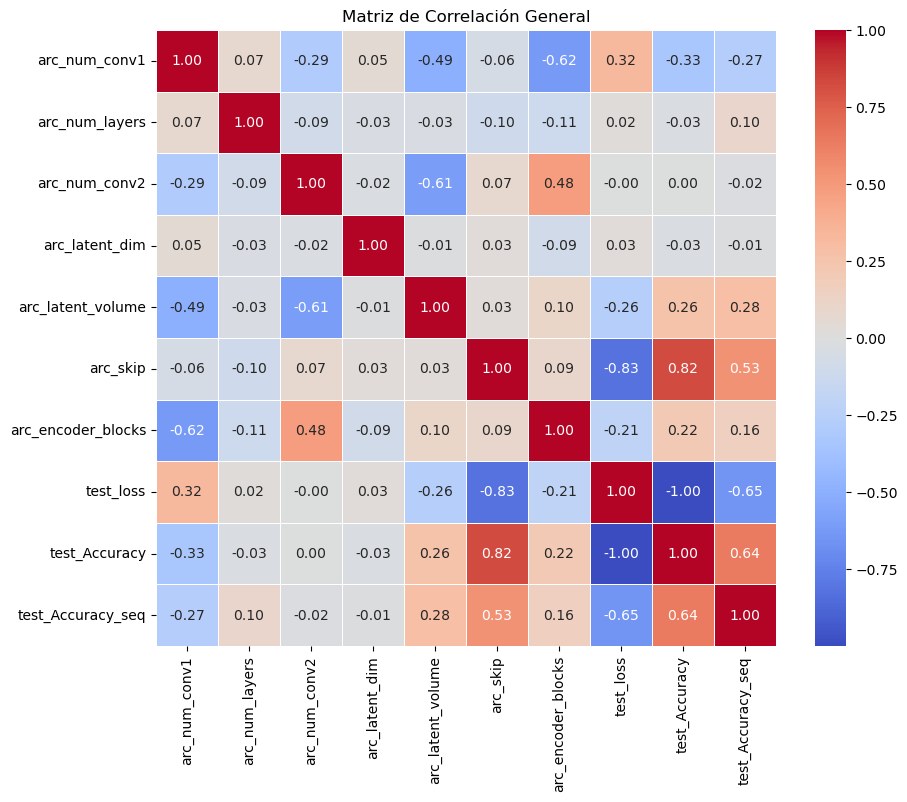

In [5]:
graficar_correlacion(data, architecture + test, "Matriz de Correlación General")

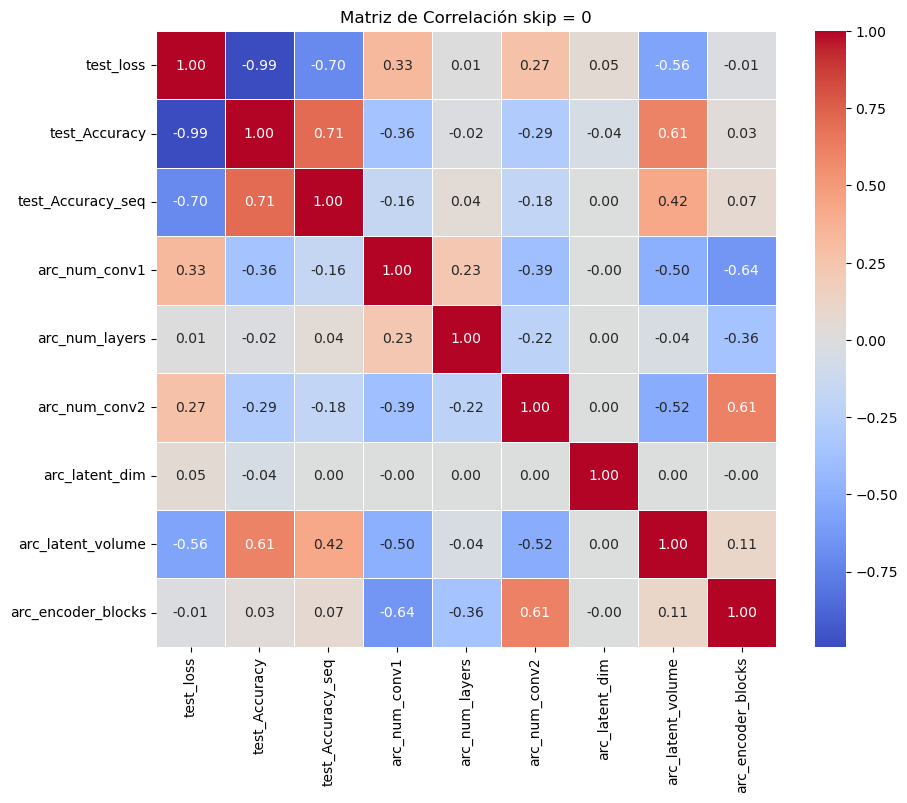

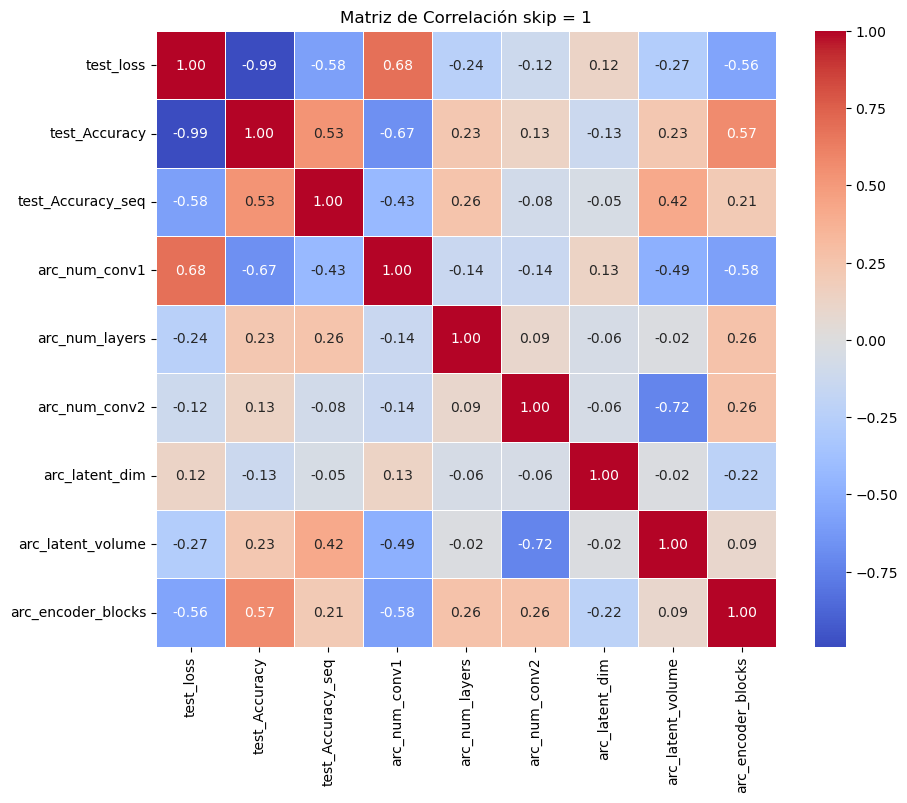

In [6]:
for s in [0, 1]:
    graficar_correlacion(
        data[data["arc_skip"] == s],
        test + [a for a in architecture if a != "arc_skip"],
        "Matriz de Correlación skip = " + str(s),
    )

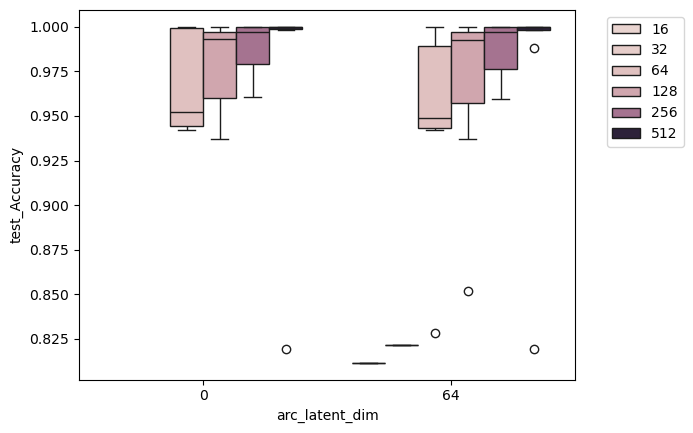

In [7]:
ax = sns.boxplot(
    data=data[data["arc_skip"] == 1],
    x="arc_latent_dim",
    y="test_Accuracy",
    hue="arc_latent_volume",
)
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

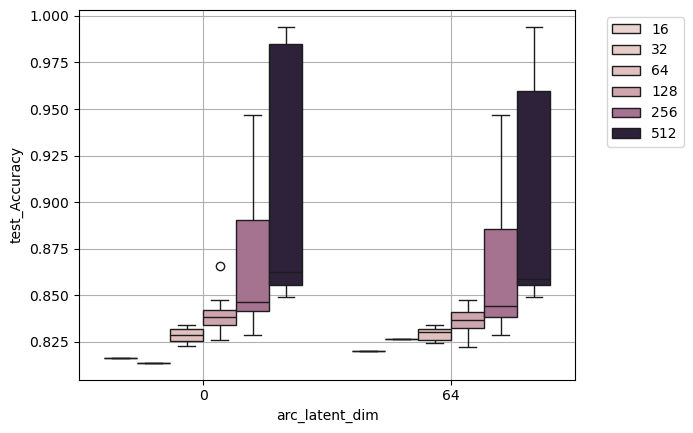

In [38]:
ax = sns.boxplot(
    data=data[data["arc_skip"] == 0],
    x="arc_latent_dim",
    y="test_Accuracy",
    hue="arc_latent_volume",
)
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
ax.grid(True)

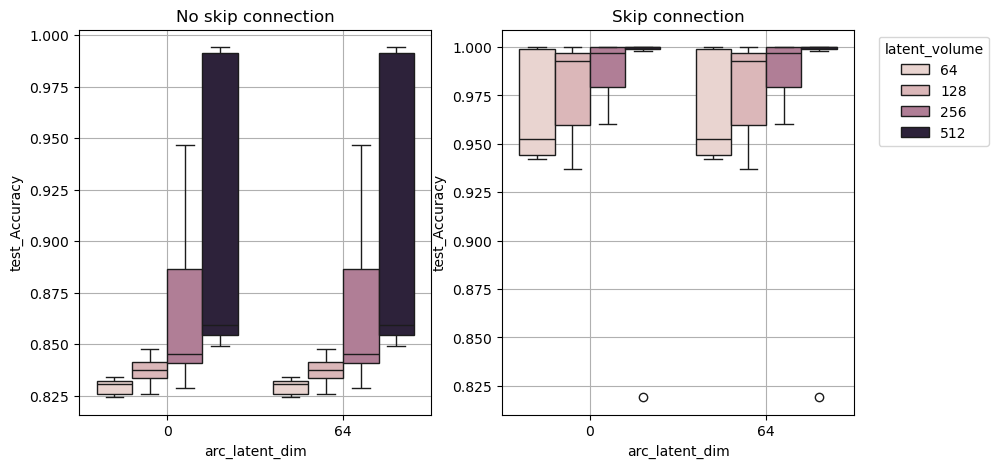

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))


ax[0].set_title("No skip connection")
sns.boxplot(
    data=data[(data["arc_skip"] == 0) & (data["arc_encoder_blocks"] == 2)],
    x="arc_latent_dim",
    y="test_Accuracy",
    hue="arc_latent_volume",
    ax=ax[0],
    legend=False,
)

ax[1].set_title("Skip connection")
sns.boxplot(
    data=data[(data["arc_skip"] == 1) & (data["arc_encoder_blocks"] == 2)],
    x="arc_latent_dim",
    y="test_Accuracy",
    hue="arc_latent_volume",
    ax=ax[1],
)
ax[1].legend(title="latent_volume", bbox_to_anchor=(1.05, 1), loc="upper left")
for a in ax:
    a.grid(True)

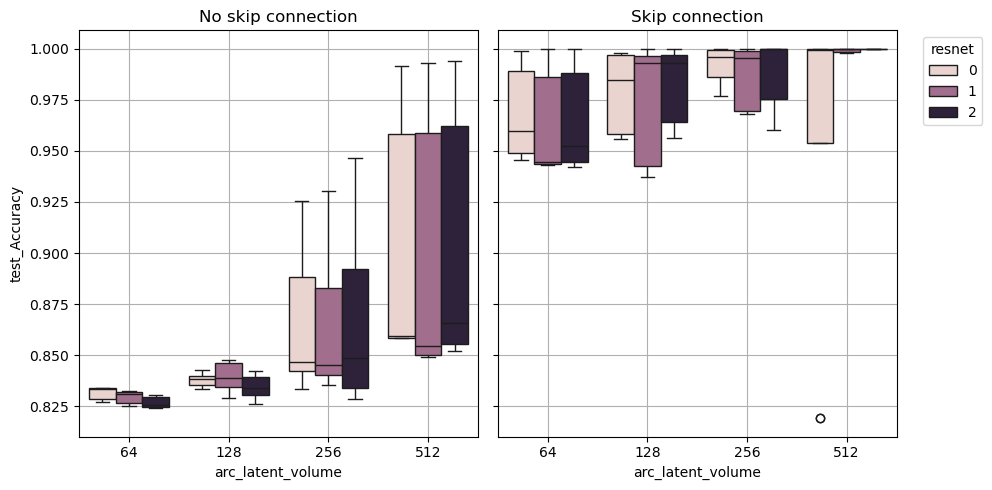

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)


ax[0].set_title("No skip connection")
sns.boxplot(
    data=data[(data["arc_skip"] == 0) & (data["arc_encoder_blocks"] == 2)],
    x="arc_latent_volume",
    y="test_Accuracy",
    hue="arc_num_layers",
    ax=ax[0],
    legend=False,
)

ax[1].set_title("e2 Skip")
sns.boxplot(
    data=data[(data["arc_skip"] == 1) & (data["arc_encoder_blocks"] == 2)],
    x="arc_latent_volume",
    y="test_Accuracy",
    hue="arc_num_layers",
    ax=ax[1],
)
ax[1].legend(title="resnet", bbox_to_anchor=(1.05, 1), loc="upper left")
for a in ax:
    a.grid(True)
fig.tight_layout()

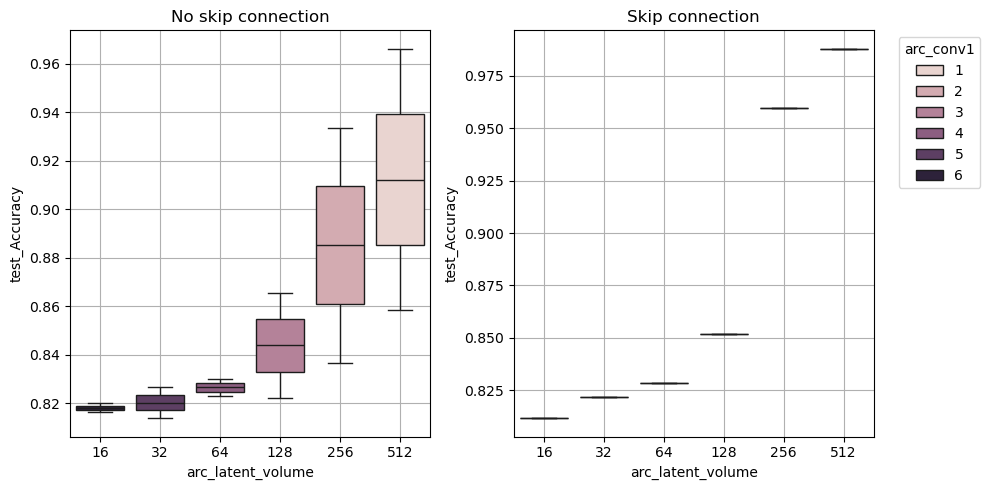

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True)


ax[0].set_title("No skip connection")
sns.boxplot(
    data=data[(data["arc_skip"] == 0) & (data["arc_encoder_blocks"] == 1)],
    x="arc_latent_volume",
    y="test_Accuracy",
    hue="arc_num_conv1",
    ax=ax[0],
    legend=False,
)

ax[1].set_title("Skip connection")
sns.boxplot(
    data=data[(data["arc_skip"] == 1) & (data["arc_encoder_blocks"] == 1)],
    x="arc_latent_volume",
    y="test_Accuracy",
    hue="arc_num_conv1",
    ax=ax[1],
)
ax[1].legend(title="arc_conv1", bbox_to_anchor=(1.05, 1), loc="upper left")
for a in ax:
    a.grid(True)
fig.tight_layout()

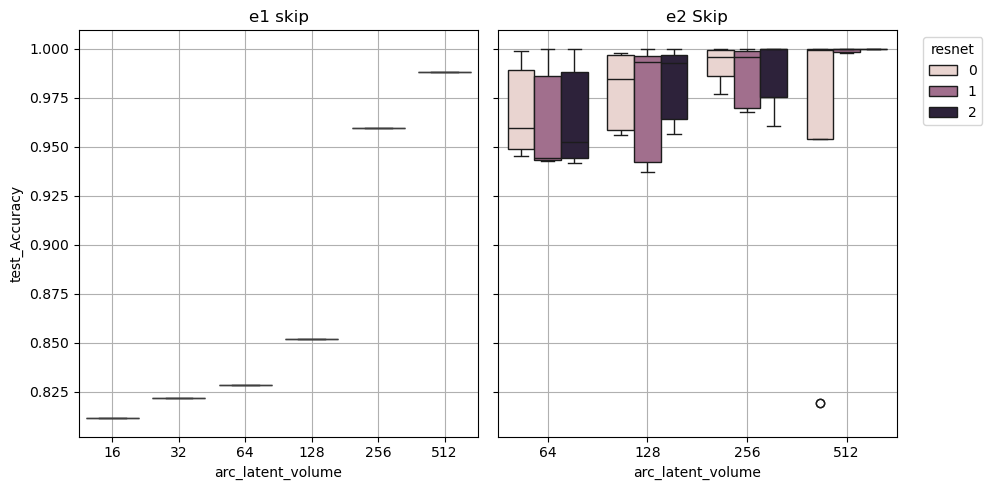

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)


ax[0].set_title("e1 skip")
sns.boxplot(
    data=data[(data["arc_skip"] == 1) & (data["arc_encoder_blocks"] == 1)],
    x="arc_latent_volume",
    y="test_Accuracy",
    hue="arc_num_layers",
    ax=ax[0],
    legend=False,
)

ax[1].set_title("e2 Skip")
sns.boxplot(
    data=data[(data["arc_skip"] == 1) & (data["arc_encoder_blocks"] == 2)],
    x="arc_latent_volume",
    y="test_Accuracy",
    hue="arc_num_layers",
    ax=ax[1],
)
ax[1].legend(title="resnet", bbox_to_anchor=(1.05, 1), loc="upper left")
for a in ax:
    a.grid(True)
fig.tight_layout()

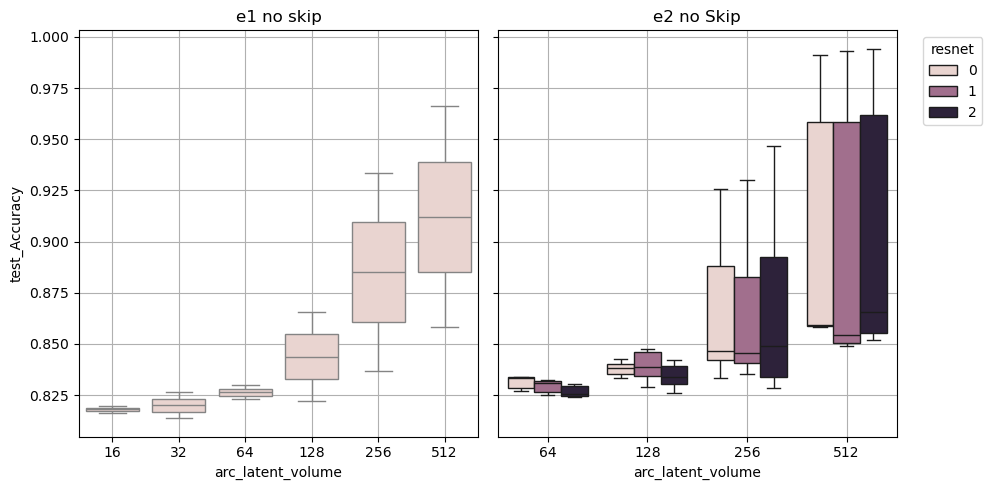

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)


ax[0].set_title("e1 no skip")
sns.boxplot(
    data=data[(data["arc_skip"] == 0) & (data["arc_encoder_blocks"] == 1)],
    x="arc_latent_volume",
    y="test_Accuracy",
    hue="arc_num_layers",
    ax=ax[0],
    legend=False,
)

ax[1].set_title("e2 no Skip")
sns.boxplot(
    data=data[(data["arc_skip"] == 0) & (data["arc_encoder_blocks"] == 2)],
    x="arc_latent_volume",
    y="test_Accuracy",
    hue="arc_num_layers",
    ax=ax[1],
)
ax[1].legend(title="resnet", bbox_to_anchor=(1.05, 1), loc="upper left")
for a in ax:
    a.grid(True)
fig.tight_layout()